<h2 align="center">AtliQ Hotels Data Analysis Project<h2>

AtliQ Grands is a company that has a hotel chain in India and running their business for the last 20 years.
Hotels are situated at namely Delhi, Mumbai, Hyderabad, and Bangalore and offer four types of Property 
(AtliQ Seasons, AtliQ Exotica, AtliQ Bay, and AtliQ Palace).These Properties offer four types of rooms 
(Standard, Elite, Premium, and Presidential) for their visitors. There are four channels through which 
they can do their bookings AtliQ Grands(own website), make your trip, Log Trip, and Tripster etc.

**AIM-**To find out why company is losing Market Share,Revenue due to competitor Strategy.

In [1]:
import pandas as pd

***
### ==> 1. Data Import and Data Exploration
***

### Datasets
We have 5 csv file 

   - dim_date.csv  
   - dim_hotels.csv
   - dim_rooms.csv
   - fact_aggregated_bookings
   - fact_bookings.csv

**Read bookings data in a dataframe**

In [2]:
df_bookings = pd.read_csv('Datasets/AtliQ Hotels Data Analysis/fact_bookings.csv')

**Explore bookings data**

In [3]:
df_bookings.head()

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,27-04-2022,01-05-2022,02-05-2022,3,RT1,direct online,1.0,Checked Out,10010,10010
1,May012216558RT12,16558,30-04-2022,01-05-2022,02-05-2022,2,RT1,others,NaN,Cancelled,9100,3640
2,May012216558RT13,16558,28-04-2022,01-05-2022,04-05-2022,2,RT1,logtrip,5.0,Checked Out,9100,9100
3,May012216558RT14,16558,28-04-2022,01-05-2022,02-05-2022,2,RT1,others,NaN,Cancelled,9100,3640
4,May012216558RT15,16558,27-04-2022,01-05-2022,02-05-2022,4,RT1,direct online,5.0,Checked Out,10920,10920


In [4]:
df_bookings.shape

(134590, 12)

In [5]:
df_bookings.room_category.unique()

array(['RT1', 'RT2', 'RT3', 'RT4'], dtype=object)

In [6]:
df_bookings.booking_platform.unique()

array(['direct online', 'others', 'logtrip', 'tripster', 'makeyourtrip',
       'journey', 'direct offline'], dtype=object)

In [7]:
df_bookings.booking_platform.value_counts()

others            55066
makeyourtrip      26898
logtrip           14756
direct online     13379
tripster           9630
journey            8106
direct offline     6755
Name: booking_platform, dtype: int64

<Axes: >

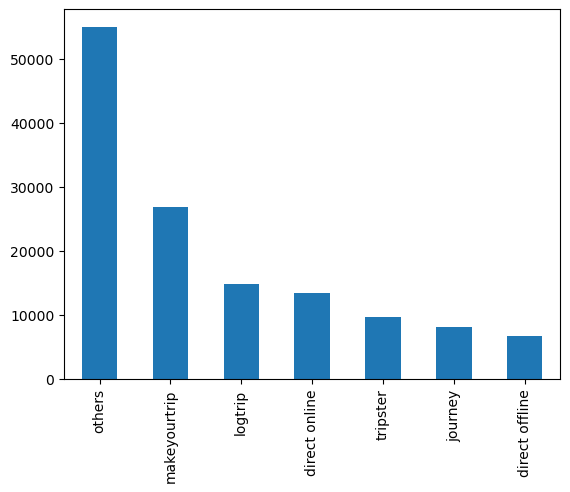

In [8]:
df_bookings.booking_platform.value_counts().plot(kind="bar")

In [9]:
df_bookings.describe()

,property_id,no_guests,ratings_given,revenue_generated,revenue_realized
count,134590.000000,134590.000000,56683.000000,134590.000000,134590.000000
mean,18061.113493,2.036808,3.619004,14916.013188,12696.123256
std,1093.055847,1.031766,1.235009,6452.868072,6928.108124
min,16558.000000,1.000000,1.000000,6500.000000,2600.000000
25%,17558.000000,1.000000,3.000000,9900.000000,7600.000000
50%,17564.000000,2.000000,4.000000,13500.000000,11700.000000
75%,18563.000000,2.000000,5.000000,18000.000000,15300.000000
max,19563.000000,6.000000,5.000000,45220.000000,45220.000000


**Read rest of the files**

In [10]:
df_date = pd.read_csv('Datasets/AtliQ Hotels Data Analysis/dim_date.csv')
df_hotels = pd.read_csv('Datasets/AtliQ Hotels Data Analysis/dim_hotels.csv')
df_rooms = pd.read_csv('Datasets/AtliQ Hotels Data Analysis/dim_rooms.csv')
df_agg_bookings = pd.read_csv('Datasets/AtliQ Hotels Data Analysis/fact_aggregated_bookings.csv')

In [11]:
df_hotels.shape

(25, 4)

In [12]:
df_hotels.head(3)

,property_id,property_name,category,city
0,16558,Atliq Grands,Luxury,Delhi
1,16559,Atliq Exotica,Luxury,Mumbai
2,16560,Atliq City,Business,Delhi


In [13]:
df_hotels.category.value_counts()

Luxury      16
Business     9
Name: category, dtype: int64

<Axes: >

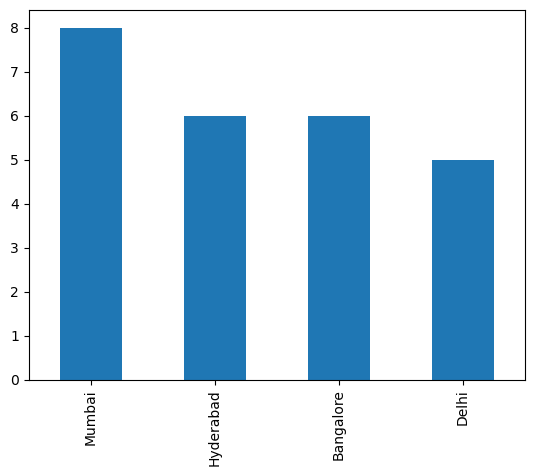

In [14]:
df_hotels.city.value_counts().plot(kind="bar")

***
**Explore aggregate bookings**
***

In [15]:
df_agg_bookings.head(3)

,property_id,check_in_date,room_category,successful_bookings,capacity
0,16559,01-May-22,RT1,25,30
1,19562,01-May-22,RT1,28,30
2,19563,01-May-22,RT1,23,30


In [16]:
df_agg_bookings.shape

(9200, 5)

**1. Find out unique property ids in aggregate bookings dataset**

In [17]:
# write your code here
len(df_agg_bookings["property_id"].unique())

25

**2. Find out total bookings per property_id**

In [18]:
# write your code here
df_agg_bookings.groupby('property_id')["successful_bookings"].sum()

property_id
16558    3153
16559    7338
16560    4693
16561    4418
16562    4820
16563    7147
17558    5036
17559    6142
17560    6013
17561    5183
17562    3424
17563    6337
17564    3982
18558    4475
18559    5256
18560    6638
18561    6458
18562    7333
18563    4728
19558    4371
19559    4705
19560    5979
19561    5736
19562    5812
19563    5413
Name: successful_bookings, dtype: int64

**3. Find out days on which bookings are greater than capacity**

In [19]:
# write your code here
df_agg_bookings[df_agg_bookings['successful_bookings']>df_agg_bookings['capacity']]


,property_id,check_in_date,room_category,successful_bookings,capacity


**4. Find out properties that have highest capacity**

In [20]:
# write your code here
print(df_agg_bookings['capacity'].max())
df_agg_bookings[df_agg_bookings['capacity']==df_agg_bookings['capacity'].max()]

50


,property_id,check_in_date,room_category,successful_bookings,capacity
27,17558,01-May-22,RT2,38,50
128,17558,02-May-22,RT2,27,50
229,17558,03-May-22,RT2,26,50
328,17558,04-May-22,RT2,27,50
428,17558,05-May-22,RT2,29,50
...,...,...,...,...,...
8728,17558,27-Jul-22,RT2,22,50
8828,17558,28-Jul-22,RT2,21,50
8928,17558,29-Jul-22,RT2,23,50
9028,17558,30-Jul-22,RT2,32,50


***
### ==> 2. Data Cleaning
***

In [21]:
df_bookings.describe()

,property_id,no_guests,ratings_given,revenue_generated,revenue_realized
count,134590.000000,134590.000000,56683.000000,134590.000000,134590.000000
mean,18061.113493,2.036808,3.619004,14916.013188,12696.123256
std,1093.055847,1.031766,1.235009,6452.868072,6928.108124
min,16558.000000,1.000000,1.000000,6500.000000,2600.000000
25%,17558.000000,1.000000,3.000000,9900.000000,7600.000000
50%,17564.000000,2.000000,4.000000,13500.000000,11700.000000
75%,18563.000000,2.000000,5.000000,18000.000000,15300.000000
max,19563.000000,6.000000,5.000000,45220.000000,45220.000000


**(1) Clean invalid guests**

In [22]:
df_bookings[df_bookings.no_guests<=0]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized


As you can see above, number of guests having less than zero value represents data error. We can ignore these records.

In [23]:
df_bookings = df_bookings[df_bookings.no_guests>0]

In [24]:
df_bookings.shape

(134590, 12)

**(2) Outlier removal in revenue generated**

In [25]:
df_bookings.revenue_generated.min(), df_bookings.revenue_generated.max()

(6500, 45220)

In [26]:
df_bookings.revenue_generated.mean(), df_bookings.revenue_generated.median()

(14916.013188201203, 13500.0)

In [27]:
avg, std = df_bookings.revenue_generated.mean(), df_bookings.revenue_generated.std()

In [28]:
higher_limit = avg + 3*std
higher_limit

34274.617403506796

In [29]:
lower_limit = avg - 3*std
lower_limit

-4442.59102710439

In [30]:
df_bookings[df_bookings.revenue_generated<=0]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized


In [31]:
df_bookings[df_bookings.revenue_generated>higher_limit]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
137,May012216559RT41,16559,27-04-2022,01-05-2022,07-05-2022,4,RT4,others,NaN,Checked Out,38760,38760
139,May012216559RT43,16559,01-05-2022,01-05-2022,02-05-2022,6,RT4,tripster,3.0,Checked Out,45220,45220
143,May012216559RT47,16559,28-04-2022,01-05-2022,03-05-2022,3,RT4,others,5.0,Checked Out,35530,35530
149,May012216559RT413,16559,24-04-2022,01-05-2022,07-05-2022,5,RT4,logtrip,NaN,Checked Out,41990,41990
153,May012216559RT417,16559,30-04-2022,01-05-2022,02-05-2022,4,RT4,others,NaN,Cancelled,38760,15504
...,...,...,...,...,...,...,...,...,...,...,...,...
134467,Jul312219562RT45,19562,28-07-2022,31-07-2022,01-08-2022,6,RT4,makeyourtrip,4.0,Checked Out,39900,39900
134469,Jul312219562RT47,19562,10-07-2022,31-07-2022,06-08-2022,5,RT4,makeyourtrip,NaN,Cancelled,37050,14820
134474,Jul312219562RT412,19562,25-07-2022,31-07-2022,06-08-2022,5,RT4,direct offline,5.0,Checked Out,37050,37050
134581,Jul312217564RT42,17564,31-07-2022,31-07-2022,01-08-2022,4,RT4,makeyourtrip,4.0,Checked Out,38760,38760


In [32]:
df_bookings = df_bookings[df_bookings.revenue_generated<=higher_limit]
df_bookings.shape

(133070, 12)

In [33]:
df_bookings.revenue_realized.describe()

count    133070.000000
mean      12468.775464
std        6537.748605
min        2600.000000
25%        7600.000000
50%       11400.000000
75%       15300.000000
max       34200.000000
Name: revenue_realized, dtype: float64

In [34]:
higher_limit = df_bookings.revenue_realized.mean() + 3*df_bookings.revenue_realized.std()
higher_limit

32082.021279982062

In [35]:
df_bookings[df_bookings.revenue_realized>higher_limit]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
140,May012216559RT44,16559,28-04-2022,01-05-2022,05-05-2022,2,RT4,others,NaN,Checked Out,32300,32300
141,May012216559RT45,16559,28-04-2022,01-05-2022,04-05-2022,2,RT4,others,5.0,Checked Out,32300,32300
144,May012216559RT48,16559,26-04-2022,01-05-2022,02-05-2022,2,RT4,makeyourtrip,5.0,Checked Out,32300,32300
145,May012216559RT49,16559,28-04-2022,01-05-2022,03-05-2022,2,RT4,others,NaN,Checked Out,32300,32300
146,May012216559RT410,16559,30-04-2022,01-05-2022,06-05-2022,2,RT4,logtrip,NaN,No Show,32300,32300
...,...,...,...,...,...,...,...,...,...,...,...,...
134580,Jul312217564RT41,17564,31-07-2022,31-07-2022,02-08-2022,1,RT4,direct online,NaN,Checked Out,32300,32300
134582,Jul312217564RT43,17564,31-07-2022,31-07-2022,03-08-2022,1,RT4,others,1.0,Checked Out,32300,32300
134584,Jul312217564RT45,17564,30-07-2022,31-07-2022,01-08-2022,2,RT4,others,2.0,Checked Out,32300,32300
134585,Jul312217564RT46,17564,29-07-2022,31-07-2022,03-08-2022,1,RT4,makeyourtrip,2.0,Checked Out,32300,32300


One observation we can have in above dataframe is that all rooms are RT4 which means presidential suit. Now since RT4 is a luxurious room it is likely their rent will be higher. To make a fair analysis, we need to do data analysis only on RT4 room types

In [36]:
df_bookings[df_bookings.room_category=="RT4"].revenue_realized.describe()

count    14553.000000
mean     22483.440390
std       8338.248282
min       7600.000000
25%      19000.000000
50%      22800.000000
75%      31350.000000
max      34200.000000
Name: revenue_realized, dtype: float64

In [37]:
# mean + 3*standard deviation
23439+3*9048

50583

Here higher limit comes to be 50583 and in our dataframe above we can see that max value for revenue realized is 45220. Hence we can conclude that there is no outlier and we don't need to do any data cleaning on this particular column

In [38]:
df_bookings[df_bookings.booking_id=="May012216558RT213"]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
30,May012216558RT213,16558,29-04-2022,01-05-2022,02-05-2022,2,RT2,logtrip,4.0,Checked Out,12600,12600


In [39]:
df_bookings.isnull().sum()

booking_id               0
property_id              0
booking_date             0
check_in_date            0
checkout_date            0
no_guests                0
room_category            0
booking_platform         0
ratings_given        77054
booking_status           0
revenue_generated        0
revenue_realized         0
dtype: int64

Total values in our dataframe is 134576. Out of that 77899 rows has null rating. Since there are many rows with null rating, we should not filter these values. Also we should not replace this rating with a median or mean rating etc 

**1. In aggregate bookings find columns that have null values. Fill these null values with whatever you think is the appropriate subtitute (possible ways is to use mean or median)**

In [40]:
# write your code here
df_agg_bookings.isnull().sum()

property_id            0
check_in_date          0
room_category          0
successful_bookings    0
capacity               0
dtype: int64

In [41]:
df_agg_bookings[df_agg_bookings.capacity.isna()]



,property_id,check_in_date,room_category,successful_bookings,capacity


In [42]:
df_agg_bookings.capacity.median()

25.0

In [43]:
df_agg_bookings.capacity.fillna(df_agg_bookings.capacity.median(), inplace=True)

In [44]:
df_agg_bookings.loc[[8,14]]

,property_id,check_in_date,room_category,successful_bookings,capacity
8,17561,01-May-22,RT1,22,26
14,17562,01-May-22,RT1,12,20


**2. In aggregate bookings find out records that have successful_bookings value greater than capacity. Filter those records**

In [45]:
# write your code here
df_agg_bookings[df_agg_bookings['successful_bookings']>df_agg_bookings['capacity']]

,property_id,check_in_date,room_category,successful_bookings,capacity


In [46]:
df_agg_bookings=df_agg_bookings[df_agg_bookings['successful_bookings']<=df_agg_bookings['capacity']]

In [47]:
df_agg_bookings.shape

(9200, 5)

***
### ==> 3. Data Transformation
***

**Create occupancy percentage column**

In [48]:
df_agg_bookings.head(3)

,property_id,check_in_date,room_category,successful_bookings,capacity
0,16559,01-May-22,RT1,25,30
1,19562,01-May-22,RT1,28,30
2,19563,01-May-22,RT1,23,30


In [49]:
df_agg_bookings['occ_pct'] = df_agg_bookings.apply(lambda row: row['successful_bookings']/row['capacity'], axis=1)

You can use following approach to get rid of SettingWithCopyWarning

In [50]:
new_col = df_agg_bookings.apply(lambda row: row['successful_bookings']/row['capacity'], axis=1)
df_agg_bookings = df_agg_bookings.assign(occ_pct=new_col.values)
df_agg_bookings.head(3)

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct
0,16559,01-May-22,RT1,25,30,0.833333
1,19562,01-May-22,RT1,28,30,0.933333
2,19563,01-May-22,RT1,23,30,0.766667


Convert it to a percentage value

In [51]:
df_agg_bookings['occ_pct'] = df_agg_bookings['occ_pct'].apply(lambda x: round(x*100, 2))
df_agg_bookings.head(3)

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct
0,16559,01-May-22,RT1,25,30,83.33
1,19562,01-May-22,RT1,28,30,93.33
2,19563,01-May-22,RT1,23,30,76.67


In [52]:
df_bookings.head()

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,27-04-2022,01-05-2022,02-05-2022,3,RT1,direct online,1.0,Checked Out,10010,10010
1,May012216558RT12,16558,30-04-2022,01-05-2022,02-05-2022,2,RT1,others,NaN,Cancelled,9100,3640
2,May012216558RT13,16558,28-04-2022,01-05-2022,04-05-2022,2,RT1,logtrip,5.0,Checked Out,9100,9100
3,May012216558RT14,16558,28-04-2022,01-05-2022,02-05-2022,2,RT1,others,NaN,Cancelled,9100,3640
4,May012216558RT15,16558,27-04-2022,01-05-2022,02-05-2022,4,RT1,direct online,5.0,Checked Out,10920,10920


In [53]:
df_agg_bookings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9200 entries, 0 to 9199
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   property_id          9200 non-null   int64  
 1   check_in_date        9200 non-null   object 
 2   room_category        9200 non-null   object 
 3   successful_bookings  9200 non-null   int64  
 4   capacity             9200 non-null   int64  
 5   occ_pct              9200 non-null   float64
dtypes: float64(1), int64(3), object(2)
memory usage: 503.1+ KB


There are various types of data transformations that you may have to perform based on the need. Few examples of data transformations are,

1. Creating new columns
1. Normalization
1. Merging data
1. Aggregation

***
### ==> 4. Insights Generation
***

**1. What is an average occupancy rate in each of the room categories?**

In [54]:
df_agg_bookings.head(3)

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct
0,16559,01-May-22,RT1,25,30,83.33
1,19562,01-May-22,RT1,28,30,93.33
2,19563,01-May-22,RT1,23,30,76.67


In [55]:
df_agg_bookings.groupby("room_category")["occ_pct"].mean()

room_category
RT1    57.919022
RT2    58.007948
RT3    58.028213
RT4    59.278722
Name: occ_pct, dtype: float64

I don't understand RT1, RT2 etc. Print room categories such as Standard, Premium, Elite etc along with average occupancy percentage

In [56]:
df = pd.merge(df_agg_bookings, df_rooms, left_on="room_category", right_on="room_id")
df.head(4)

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_id,room_class
0,16559,01-May-22,RT1,25,30,83.33,RT1,Standard
1,19562,01-May-22,RT1,28,30,93.33,RT1,Standard
2,19563,01-May-22,RT1,23,30,76.67,RT1,Standard
3,17558,01-May-22,RT1,13,19,68.42,RT1,Standard


In [57]:
df.drop("room_id",axis=1, inplace=True)
df.head(4)

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_class
0,16559,01-May-22,RT1,25,30,83.33,Standard
1,19562,01-May-22,RT1,28,30,93.33,Standard
2,19563,01-May-22,RT1,23,30,76.67,Standard
3,17558,01-May-22,RT1,13,19,68.42,Standard


In [58]:
df.groupby("room_class")["occ_pct"].mean()

room_class
Elite           58.007948
Premium         58.028213
Presidential    59.278722
Standard        57.919022
Name: occ_pct, dtype: float64

In [59]:
df[df.room_class=="Standard"].occ_pct.mean()

57.919021739130436

**2. Print average occupancy rate per city**

In [60]:
df_hotels.head(3)

,property_id,property_name,category,city
0,16558,Atliq Grands,Luxury,Delhi
1,16559,Atliq Exotica,Luxury,Mumbai
2,16560,Atliq City,Business,Delhi


In [61]:
df = pd.merge(df, df_hotels, on="property_id")
df.head(3)

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_class,property_name,category,city
0,16559,01-May-22,RT1,25,30,83.33,Standard,Atliq Exotica,Luxury,Mumbai
1,16559,02-May-22,RT1,20,30,66.67,Standard,Atliq Exotica,Luxury,Mumbai
2,16559,03-May-22,RT1,17,30,56.67,Standard,Atliq Exotica,Luxury,Mumbai


In [62]:
df.groupby("city")["occ_pct"].mean()

city
Bangalore    56.341046
Delhi        61.521630
Hyderabad    58.122006
Mumbai       57.915679
Name: occ_pct, dtype: float64

**3. When was the occupancy better? Weekday or Weekend?**

In [63]:
df_date.head(3)

,date,mmm yy,week no,day_type
0,01-May-22,May 22,W 19,weekend
1,02-May-22,May 22,W 19,weekeday
2,03-May-22,May 22,W 19,weekeday


In [64]:
df = pd.merge(df, df_date, left_on="check_in_date", right_on="date")
df.head(3)

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_class,property_name,category,city,date,mmm yy,week no,day_type
0,16559,01-May-22,RT1,25,30,83.33,Standard,Atliq Exotica,Luxury,Mumbai,01-May-22,May 22,W 19,weekend
1,16559,01-May-22,RT2,35,41,85.37,Elite,Atliq Exotica,Luxury,Mumbai,01-May-22,May 22,W 19,weekend
2,16559,01-May-22,RT3,27,32,84.38,Premium,Atliq Exotica,Luxury,Mumbai,01-May-22,May 22,W 19,weekend


In [65]:
df.groupby("day_type")["occ_pct"].mean().round(2)

day_type
weekeday    51.81
weekend     73.96
Name: occ_pct, dtype: float64

**4: In the month of June, what is the occupancy for different cities**

In [66]:
df_june_22 = df[df["mmm yy"]=="Jun 22"]
df_june_22.head(4)

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_class,property_name,category,city,date,mmm yy,week no,day_type
3100,16559,01-Jun-22,RT1,14,30,46.67,Standard,Atliq Exotica,Luxury,Mumbai,01-Jun-22,Jun 22,W 23,weekeday
3101,16559,01-Jun-22,RT2,21,41,51.22,Elite,Atliq Exotica,Luxury,Mumbai,01-Jun-22,Jun 22,W 23,weekeday
3102,16559,01-Jun-22,RT3,15,32,46.88,Premium,Atliq Exotica,Luxury,Mumbai,01-Jun-22,Jun 22,W 23,weekeday
3103,16559,01-Jun-22,RT4,8,18,44.44,Presidential,Atliq Exotica,Luxury,Mumbai,01-Jun-22,Jun 22,W 23,weekeday


In [67]:
df_june_22.groupby('city')['occ_pct'].mean().round(2).sort_values(ascending=False)

city
Delhi        61.46
Mumbai       57.79
Hyderabad    57.69
Bangalore    55.85
Name: occ_pct, dtype: float64

<Axes: xlabel='city'>

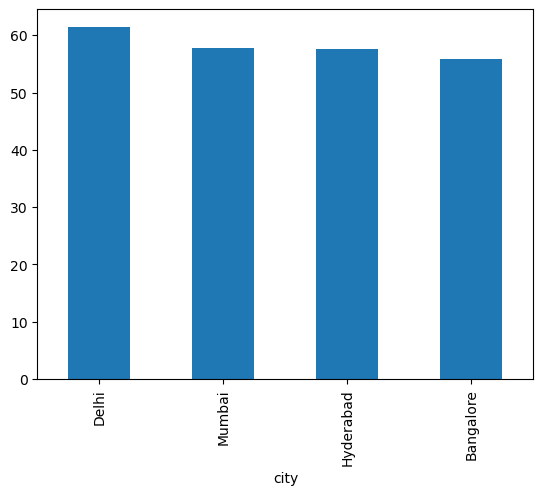

In [68]:
df_june_22.groupby('city')['occ_pct'].mean().round(2).sort_values(ascending=False).plot(kind="bar")

**5. Print revenue realized per city**

In [69]:
df_bookings.head()

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,27-04-2022,01-05-2022,02-05-2022,3,RT1,direct online,1.0,Checked Out,10010,10010
1,May012216558RT12,16558,30-04-2022,01-05-2022,02-05-2022,2,RT1,others,NaN,Cancelled,9100,3640
2,May012216558RT13,16558,28-04-2022,01-05-2022,04-05-2022,2,RT1,logtrip,5.0,Checked Out,9100,9100
3,May012216558RT14,16558,28-04-2022,01-05-2022,02-05-2022,2,RT1,others,NaN,Cancelled,9100,3640
4,May012216558RT15,16558,27-04-2022,01-05-2022,02-05-2022,4,RT1,direct online,5.0,Checked Out,10920,10920


In [70]:
df_hotels.head(3)

,property_id,property_name,category,city
0,16558,Atliq Grands,Luxury,Delhi
1,16559,Atliq Exotica,Luxury,Mumbai
2,16560,Atliq City,Business,Delhi


In [71]:
df_bookings_all = pd.merge(df_bookings, df_hotels, on="property_id")
df_bookings_all.head(3)

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,property_name,category,city
0,May012216558RT11,16558,27-04-2022,01-05-2022,02-05-2022,3,RT1,direct online,1.0,Checked Out,10010,10010,Atliq Grands,Luxury,Delhi
1,May012216558RT12,16558,30-04-2022,01-05-2022,02-05-2022,2,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi
2,May012216558RT13,16558,28-04-2022,01-05-2022,04-05-2022,2,RT1,logtrip,5.0,Checked Out,9100,9100,Atliq Grands,Luxury,Delhi


In [72]:
df_bookings_all.groupby("city")["revenue_realized"].sum()

city
Bangalore    415122840
Delhi        289472918
Hyderabad    325232870
Mumbai       629391323
Name: revenue_realized, dtype: int64

**6. Print month by month revenue**

In [73]:
df_date.head(3)

,date,mmm yy,week no,day_type
0,01-May-22,May 22,W 19,weekend
1,02-May-22,May 22,W 19,weekeday
2,03-May-22,May 22,W 19,weekeday


In [74]:
df_date["mmm yy"].unique()

array(['May 22', 'Jun 22', 'Jul 22'], dtype=object)

In [75]:
df_bookings_all.head(3)

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,property_name,category,city
0,May012216558RT11,16558,27-04-2022,01-05-2022,02-05-2022,3,RT1,direct online,1.0,Checked Out,10010,10010,Atliq Grands,Luxury,Delhi
1,May012216558RT12,16558,30-04-2022,01-05-2022,02-05-2022,2,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi
2,May012216558RT13,16558,28-04-2022,01-05-2022,04-05-2022,2,RT1,logtrip,5.0,Checked Out,9100,9100,Atliq Grands,Luxury,Delhi


In [76]:
df_date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      92 non-null     object
 1   mmm yy    92 non-null     object
 2   week no   92 non-null     object
 3   day_type  92 non-null     object
dtypes: object(4)
memory usage: 3.0+ KB


In [77]:
df_date["date"] = pd.to_datetime(df_date["date"])
df_date.head(3)

,date,mmm yy,week no,day_type
0,2022-05-01,May 22,W 19,weekend
1,2022-05-02,May 22,W 19,weekeday
2,2022-05-03,May 22,W 19,weekeday


In [78]:
df_bookings_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 133070 entries, 0 to 133069
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   booking_id         133070 non-null  object 
 1   property_id        133070 non-null  int64  
 2   booking_date       133070 non-null  object 
 3   check_in_date      133070 non-null  object 
 4   checkout_date      133070 non-null  object 
 5   no_guests          133070 non-null  int64  
 6   room_category      133070 non-null  object 
 7   booking_platform   133070 non-null  object 
 8   ratings_given      56016 non-null   float64
 9   booking_status     133070 non-null  object 
 10  revenue_generated  133070 non-null  int64  
 11  revenue_realized   133070 non-null  int64  
 12  property_name      133070 non-null  object 
 13  category           133070 non-null  object 
 14  city               133070 non-null  object 
dtypes: float64(1), int64(4), object(10)
memory usage: 1

In [79]:
df_bookings_all["check_in_date"] = pd.to_datetime(df_bookings_all["check_in_date"],dayfirst=True)
df_bookings_all.head(4)

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,property_name,category,city
0,May012216558RT11,16558,27-04-2022,2022-05-01,02-05-2022,3,RT1,direct online,1.0,Checked Out,10010,10010,Atliq Grands,Luxury,Delhi
1,May012216558RT12,16558,30-04-2022,2022-05-01,02-05-2022,2,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi
2,May012216558RT13,16558,28-04-2022,2022-05-01,04-05-2022,2,RT1,logtrip,5.0,Checked Out,9100,9100,Atliq Grands,Luxury,Delhi
3,May012216558RT14,16558,28-04-2022,2022-05-01,02-05-2022,2,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi


In [80]:
df_bookings_all = pd.merge(df_bookings_all, df_date, left_on="check_in_date", right_on="date")
df_bookings_all.head(3)

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,property_name,category,city,date,mmm yy,week no,day_type
0,May012216558RT11,16558,27-04-2022,2022-05-01,02-05-2022,3,RT1,direct online,1.0,Checked Out,10010,10010,Atliq Grands,Luxury,Delhi,2022-05-01,May 22,W 19,weekend
1,May012216558RT12,16558,30-04-2022,2022-05-01,02-05-2022,2,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi,2022-05-01,May 22,W 19,weekend
2,May012216558RT13,16558,28-04-2022,2022-05-01,04-05-2022,2,RT1,logtrip,5.0,Checked Out,9100,9100,Atliq Grands,Luxury,Delhi,2022-05-01,May 22,W 19,weekend


In [81]:
df_bookings_all.columns

Index(['booking_id', 'property_id', 'booking_date', 'check_in_date',
       'checkout_date', 'no_guests', 'room_category', 'booking_platform',
       'ratings_given', 'booking_status', 'revenue_generated',
       'revenue_realized', 'property_name', 'category', 'city', 'date',
       'mmm yy', 'week no', 'day_type'],
      dtype='object')

In [82]:
df_bookings_all.groupby("mmm yy")["revenue_realized"].sum()

mmm yy
Jul 22    556460174
Jun 22    537219271
May 22    565540506
Name: revenue_realized, dtype: int64

**1. Print revenue realized per hotel type**

In [83]:
# write your code here
df_bookings_all.property_name.unique()

array(['Atliq Grands', 'Atliq Exotica', 'Atliq City', 'Atliq Blu',
       'Atliq Bay', 'Atliq Palace', 'Atliq Seasons'], dtype=object)

In [84]:
df_bookings_all.groupby("property_name")['revenue_realized'].sum().round(2).sort_values()

property_name
Atliq Seasons     62430375
Atliq Grands     207800708
Atliq Bay        255735290
Atliq Blu        256643260
Atliq City       279554213
Atliq Palace     294193161
Atliq Exotica    302862944
Name: revenue_realized, dtype: int64

**2. Print average rating per city**

In [85]:
df_bookings_all.groupby("city")['ratings_given'].mean().round(2).sort_values()

city
Bangalore    3.41
Mumbai       3.65
Hyderabad    3.66
Delhi        3.78
Name: ratings_given, dtype: float64

In [86]:
# write your code here

**3. Print a pie chart of revenue realized per booking platform**

<Axes: ylabel='revenue_realized'>

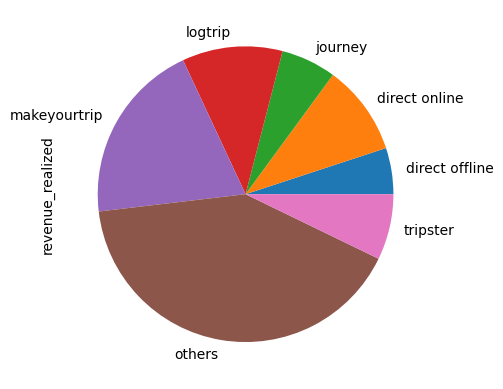

In [87]:
# write your code here
df_bookings_all.groupby("booking_platform")['revenue_realized'].sum().plot(kind="pie")

### Conclusion
In conclusion, this project demonstrates the application of Python for AtliQ Grand Hotel Data analysis. The insights gained can contribute 
to find out why the company is losing Market Share, Revenue due to competitor Strategy.